<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="100" /></center>

**<center><h3>Module 1 Assignment Solution</h3></center>**

----
# **Table of Content**
----

**1.** [**Problem Statement**](#section1)<br>
**2.** [**Loading Libraries**](#section2)<br>
**3.** [**Loading Data**](#section3)<br>
**4.** [**Data Preprocessing**](#section4)<br>
   - **4.1** [**Resizing the image**](#section401)
   - **4.2** [**Printing sample of image**](#section402)
   - **4.3** [**Data Augmentation**](#section403)
   - **4.4** [**One-Hot encoding the labels**](#section404)

**5.** [**Building the Model**](#section5)<br>
**6.** [**Compiling the Model**](#section6)<br>
**7.** [**Traning the Model**](#section7)<br>
**8.** [**Evaluate Model Performance**](#section8)<br>
**9.** [**Un-freezing the Top Layers of the Model**](#section9)<br>
   - **9.1** [**Training and Evaluating the model**](#section901)

**10.** [**Saving the Model**](#section10)<br>
**11.** [**Conclusion**](#section11)<br>

----
<a id=section1></a>
# **1. Problem Statement**
----

- The Stanford Dogs dataset contains **images** of **120** breeds of dogs from around the world. 

- This dataset has been built using images and **annotation** from **ImageNet** for the task of **fine-grained** image categorization. 

- Our task is to use **pre-trained** model and classify **120 breeds** of dogs form the **differernt** images of dogs.

<br>
<center><img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/images/dog_species.png" width="1200px" height="370px"/></center

----
<a id=section2></a>
# **2. Loading Libraries**
----

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [ ]:
# Pre-trained model
from tensorflow.keras.applications import EfficientNetB0                          

----
<a id=section3></a>
# **3. Loading Data**
----

In [ ]:
# IMG_SIZE is determined by EfficientNet model choice
IMG_SIZE = 224
batch_size = 64

**<h4>Question 1:** Load the data from tensorflow datasets.</h4>

<details>

**<summary>Hint:</summary>**

  - Set **`dataset_name = "stanford_dogs"`**

  - Use the **`tfds.load()`** function to load the train, test and data info using following parameters:

      - **`name=dataset_name`**

      - **`split=["train", "test"]`**

      -  **`with_info=True`**

      -  **`as_supervised=True`**

</details>

In [ ]:
def load_data():
  
  dataset_name = "stanford_dogs"
  (ds_train, ds_test), ds_info = tfds.load(dataset_name, split=["train", "test"], with_info=True, as_supervised=True)

  NUM_CLASSES = ds_info.features["label"].num_classes
  return ds_train, ds_test, ds_info, NUM_CLASSES


In [ ]:
ds_train, ds_test, ds_info, NUM_CLASSES = load_data()

Shuffling and writing examples to /root/tensorflow_datasets/stanford_dogs/0.2.0.incompleteFO3CHN/stanford_dogs-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/stanford_dogs/0.2.0.incompleteFO3CHN/stanford_dogs-test.tfrecord


Dataset stanford_dogs downloaded and prepared to /root/tensorflow_datasets/stanford_dogs/0.2.0. Subsequent calls will reuse this data.


- When the dataset include images with **various sizes**, we need to resize them into a **shared** size.

- The Stanford Dogs dataset includes only images at least **200x200**
pixels in size.

- We will **resize** the images to the input size needed for **EfficientNet**.

----
<a id=section4></a>
# **4. Data Preprocessing**
----

<a id=section401></a>
### **4.1 Resizing the image**

In [ ]:
size = (IMG_SIZE, IMG_SIZE)
ds_train = ds_train.map(lambda image, label: (tf.image.resize(image, size), label))
ds_test = ds_test.map(lambda image, label: (tf.image.resize(image, size), label))

In [ ]:
label_info = ds_info.features["label"]

In [ ]:
def format_label(label):
    string_label = label_info.int2str(label)
    return string_label.split("-")[1]

<a id=section402></a>
### **4.2 Printing sample of image**

**<h4>Question 2:** Print the first 9 images with its label.</h4>

<details>

**<summary>Hint:</summary>**

- Loop through the first 9 images from **`ds_train`**.

- used sub plot with paramenter (3, 3, i+1).

- Convert the image to numpy and astype to **`"uint8"`** inside plt.imshow().

</details>

In [ ]:
def print_img():
  for i, (image, label) in enumerate(ds_train.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image.numpy().astype("uint8"))
    plt.title("{}".format(format_label(label)))
    plt.axis("off")

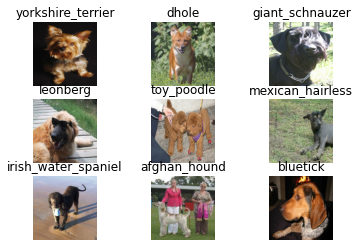

In [ ]:
print_img()

**Observations:**

- We can see nine images with its **respective** labels.

<a id=section403></a>
### **4.3 Data Augmentation**

**<h4>Question 3:** Complete the below function to create a data augmentation layers to add more variations to the image samples.</h4>

<details>

**<summary>Hint:</summary>**

- Add layers which does **`RandomRotation`** with **`factor=0.15`**.

- Add layers which does **`RandomTranslation`** with **`height_factor=0.1`** and **`width_factor=0.1`**.

</details>

In [ ]:
def data_aug():
  img_augmentation = Sequential(
      [
          preprocessing.RandomRotation(factor=0.15),
          preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1),
          preprocessing.RandomFlip(),
          preprocessing.RandomContrast(factor=0.1),
      ],
      name="img_augmentation",
  )

  return img_augmentation

In [ ]:
img_augmentation = data_aug()

**<h4>Question 4:** Print the image after the data augmentation.</h4>

<details>

**<summary>Hint:</summary>**

- Loop through the first 9 images from **`ds_train`**.

- used sub plot with **paramenter** (3, 3, i+1).

- Pass the image through `img_agumentation` layers with parameters **`(tf.expand_dims(image, axis=0))`** and store it in variable name **`aug_img`**.

- Convert the **`aug_img[0]`** to numpy and astype to **`"uint8"`** inside **`plt.imshow()`**.

</details>

In [ ]:
 def data_aug():
    for image, label in ds_train.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            aug_img = img_augmentation(tf.expand_dims(image, axis=0))
            plt.imshow(aug_img[0].numpy().astype("uint8"))
            plt.title("{}".format(format_label(label)))
            plt.axis("off")

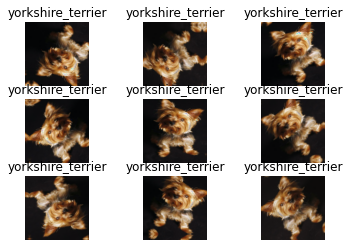

In [ ]:
data_aug()

**Observations:**

- We can various **data augmentation** applied on a single image.

<a id=section404></a>
### **4.4 One-Hot encoding the labels**

**<h4>Question 5:** Apply one hot enconding on the image labels.</h4>

<details>

**<summary>Hint:</summary>**

- You can use **`tf.one_hot`** to do the following with **`label`** and **`NUM_CLASSES`** as parameters.

</details>

In [ ]:
# One-hot / categorical encoding
def input_preprocess(image, label):
    label = tf.one_hot(label, NUM_CLASSES)
    return image, label

In [ ]:
ds_train = ds_train.map(
    input_preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE
)
ds_train = ds_train.batch(batch_size=batch_size, drop_remainder=True)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

ds_test = ds_test.map(input_preprocess)
ds_test = ds_test.batch(batch_size=batch_size, drop_remainder=True)

----
<a id=section5></a>
# **5. Building the Model**
----

In [ ]:
def build_model(num_classes):
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    x = img_augmentation(inputs)
    model = EfficientNetB0(include_top=False, input_tensor=x, weights="imagenet")

    # Freeze the pretrained weights
    model.trainable = False

    # Rebuild top
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = layers.BatchNormalization()(x)

    top_dropout_rate = 0.2
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(NUM_CLASSES, activation="softmax", name="pred")(x)
    return model, inputs, outputs


In [ ]:
model, inputs, outputs= build_model(num_classes=NUM_CLASSES)

16711680/16705208 [==============================] - 0s 0us/step


----
<a id=section6></a>
# **6. Compiling the Model**
----

**<h4>Question 6:** Create the model.</h4>

<details>

**<summary>Hint:</summary>**

- Create the model using **`tf.keras.Model`** with proper `input` and `output` and **`name="EfficientNet"`**.

</details>

In [ ]:
def create_model(model,inputs, outputs):

  model = tf.keras.Model(inputs, outputs, name="EfficientNet")

  return model

In [ ]:
 model = create_model(model,inputs, outputs)

**<h4>Question 7:** How to compile the model?</h4>

<details>

**<summary>Hint:</summary>**

- Use Optimizer as Adam with**` learning rate=1e-2 `**

- Compile model using the specified optimizer, **`loss="categorical_crossentropy"`** and **`metrics=["accuracy"]`**.

</details>

In [ ]:
def compile_model():
  optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
  model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
  return model

In [ ]:
model = compile_model()

----
<a id=section7></a>
# **7. Training the Model**
----

**<h4>Question 8:** Train the model for 10 epoch.</h4>

<details>

**<summary>Hint:</summary>**

- Use **`model.fit`** function with suitable parameters to train the model and store in a variable with name **`hist`**.

</details>

In [ ]:
def train_model():
  epochs = 10  
  hist = model.fit(ds_train, epochs=epochs, validation_data=ds_test, verbose=2)
  return hist 

In [ ]:
hist = train_model()

Epoch 1/10
187/187 - 72s - loss: 3.5153 - accuracy: 0.3732 - val_loss: 1.0343 - val_accuracy: 0.6927
Epoch 2/10
187/187 - 34s - loss: 1.8618 - accuracy: 0.5212 - val_loss: 0.8237 - val_accuracy: 0.7522
Epoch 3/10
187/187 - 34s - loss: 1.5098 - accuracy: 0.5844 - val_loss: 0.8177 - val_accuracy: 0.7561
Epoch 4/10
187/187 - 34s - loss: 1.4336 - accuracy: 0.6022 - val_loss: 0.8115 - val_accuracy: 0.7568
Epoch 5/10
187/187 - 34s - loss: 1.3803 - accuracy: 0.6128 - val_loss: 0.8009 - val_accuracy: 0.7620
Epoch 6/10
187/187 - 34s - loss: 1.3628 - accuracy: 0.6149 - val_loss: 0.8170 - val_accuracy: 0.7586
Epoch 7/10
187/187 - 34s - loss: 1.3265 - accuracy: 0.6244 - val_loss: 0.8182 - val_accuracy: 0.7528
Epoch 8/10
187/187 - 34s - loss: 1.3080 - accuracy: 0.6303 - val_loss: 0.7986 - val_accuracy: 0.7604
Epoch 9/10
187/187 - 35s - loss: 1.3004 - accuracy: 0.6263 - val_loss: 0.8346 - val_accuracy: 0.7548
Epoch 10/10
187/187 - 35s - loss: 1.2846 - accuracy: 0.6351 - val_loss: 0.8045 - val_accura

----
<a id=section8></a>
# **8. Evaluating model Performance**
----

**<h4>Question 9:** Plot accuracy curve both train and validation set.</h4>

<details>

**<summary>Hint:</summary>**

- Use the **`hist`** variable from above to plot the following.

</details>

In [ ]:
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


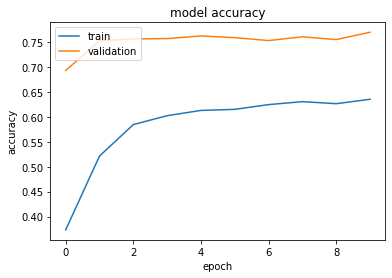

In [ ]:
plot_hist(hist)

**Observations:**

- We can see **higher** validation accuracy compared to traning accuracy. 

----
<a id=section9></a>
# **9. Un-freezing the Top Layers of the Model**
----

In [ ]:
def unfreeze_model(model):
    # We unfreeze the top 20 layers while leaving BatchNorm layers frozen
    for layer in model.layers[-20:]:
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True

    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )


In [ ]:
unfreeze_model(model)

<a id=section901></a>
### **9.1 Training and Evaluating the model**

**<h4>Question 10:** Train the model for 15 epoch and plot the train and validation accuracy curve.</h4>

<details>

**<summary>Hint:</summary>**

- Use **`model.fit`** function with suitable parameters to train the model and store in a variable with name **`hist_2`**.

</details>

In [ ]:
def train_unf():
  epochs = 15
  hist_2 = model.fit(ds_train, epochs=epochs, validation_data=ds_test, verbose=2)
  plot_hist(hist_2)

Epoch 1/15
187/187 - 43s - loss: 1.0281 - accuracy: 0.7020 - val_loss: 0.6915 - val_accuracy: 0.7961
Epoch 2/15
187/187 - 37s - loss: 0.8734 - accuracy: 0.7359 - val_loss: 0.6953 - val_accuracy: 0.7944
Epoch 3/15
187/187 - 37s - loss: 0.8366 - accuracy: 0.7452 - val_loss: 0.6920 - val_accuracy: 0.7965
Epoch 4/15
187/187 - 37s - loss: 0.7717 - accuracy: 0.7661 - val_loss: 0.6907 - val_accuracy: 0.7994
Epoch 5/15
187/187 - 37s - loss: 0.7302 - accuracy: 0.7778 - val_loss: 0.6940 - val_accuracy: 0.7933
Epoch 6/15
187/187 - 37s - loss: 0.6968 - accuracy: 0.7851 - val_loss: 0.6994 - val_accuracy: 0.7959
Epoch 7/15
187/187 - 37s - loss: 0.6581 - accuracy: 0.7976 - val_loss: 0.7202 - val_accuracy: 0.7934
Epoch 8/15
187/187 - 37s - loss: 0.6338 - accuracy: 0.8099 - val_loss: 0.7011 - val_accuracy: 0.7942
Epoch 9/15
187/187 - 37s - loss: 0.5955 - accuracy: 0.8133 - val_loss: 0.7081 - val_accuracy: 0.7928
Epoch 10/15
187/187 - 37s - loss: 0.5771 - accuracy: 0.8239 - val_loss: 0.7096 - val_accura

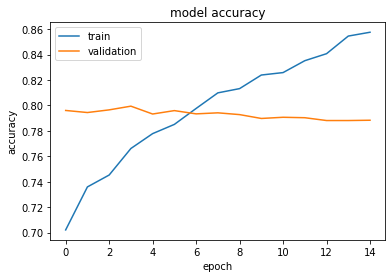

In [ ]:
train_unf()

**Observations:**

- We can see **increase** in training accuracy.

- We see that the model is **overfitting** the training data.

----
<a id=section10></a>
# **10. Saving the Model**
----

**<h4>Question 11:** Saving the model.</h4>

<details>

**<summary>Hint:</summary>**

- Use **`model.save()`** function to save the model using `model.h5` as its name.

</details>

In [ ]:
def save_model(model):
  model.save('model.h5')

In [ ]:
save_model(model)

----
<a id=section11></a>
# **11. Conclusion**
----

- We have learned about **processing** image data using **differernt** image preprocessing methods.

- We have **learned** the basics idea about **transfer learning** and its usefullness.

- Transfer learning helps us to save time and **resources** and give us good result with **minimum** effort.